In [1]:
library(cowplot)
source(file.path('~/link/res_publish','func_r_map_seurat.r'))

p_root_item = file.path('.')
p_plot_item = file.path(p_root_item,'fig')
if(!dir.exists(p_plot_item)){
    dir.create(p_plot_item,recursive = TRUE)
}

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ lubridate::stamp() masks cowplot::stamp()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: SeuratObject

Loading required package: sp

‘SeuratObject’ was built under R 4.3.2 but the current version is
4.3.3; it is recomended that you reinstall ‘SeuratObject’ as the ABI
for R may have changed

‘SeuratObject’ was built with package ‘Matrix’ 1.6.3 but the current
version is 1.6.5; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed


Attaching packag


> function----------------------------------------
Seurat_to_mtx

> Map_Seurat function-----------------------------
Map_Seurat_normalize
Map_Seurat_cluster
Map_Seurat_mapquery
precess_after_Seurat
run_Seurat			[simply]

> other-------------------------------------------
get_path_varmap
show_obj
savefig
Seurat_metadata_leftjoin
Seurat_gene_detect


# all

In [2]:
item = 'merge'
dims = 1:20
resolution = 0.1

p_out = file.path(sprintf('obs_seurat_%s_without_harmony.csv',item))
if(file.exists(p_out)){
    cat(sprintf('[exist] %s\n',p_out))
}else{
    adata <- load_Seuratobj(file.path(p_cache, "disease", "merge_mouse_kideny_healthy_SLE"))
    adata@meta.data = adata@meta.data %>% select(cell_name,orig.ident,
                                                 nCount_RNA,nFeature_RNA,X_batch,cell_type,status) %>%
        rename(pre_cell_type = cell_type)
    
    # QC
    {
        adata[["percent.mt"]] <- PercentageFeatureSet(adata, pattern = "^[Mm][Tt]-")
        # -------------------------
        # percent.mt_before.png
        # -------------------------
        ncol_ <- 3
        nrow_ <- 1
        options(repr.plot.width = 6 * ncol_, repr.plot.height = 6 * nrow_)
        p = VlnPlot(adata, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
        print(p)
        adata <- subset(adata, subset = nFeature_RNA > 200 & nFeature_RNA < 4000 & percent.mt < 10)
        # -------------------------
        # percent.mt.png
        # -------------------------
        ncol_ <- 3
        nrow_ <- 1
        options(repr.plot.width = 6 * ncol_, repr.plot.height = 6 * nrow_)
        p = VlnPlot(adata, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
        print(p)
    }
    # 标准流程
    {
        adata@meta.data %>% head(2)
        options(repr.plot.width = 1 * 6, repr.plot.height = 1 * 6)
        adata <- Map_Seurat_normalize(adata)
        # function (adata, dims, resolution, key_batch, key_celltype = NULL, verbose = FALSE)
        options(repr.plot.width = 1 * 6, repr.plot.height = 1 * 6)
        adata <- Map_Seurat_cluster(adata, dims = dims, resolution = resolution)
    }
    # UMAPPlot
    {
        options(repr.plot.width = 1 * 6, repr.plot.height = 1 * 6)
        p1 <- UMAPPlot(adata,group.by='status')  + them_legend
        options(repr.plot.width = 3 * 6, repr.plot.height = 1 * 6)
        p2 <- UMAPPlot(adata,group.by='status', split.by = 'status') + them_legend
        
        p=cowplot::plot_grid(p1,p2,nrow=1,ncol=2,rel_widths = c(1,3))
        print(p)
        savefig(p,sprintf('%s_umap_cluster_without_harmony.png',item),p_plot_item,
                width_ratio = ncol_ * 6, height_ratio = nrow_  * 6)
    }
    adata@meta.data %>% select(cell_name,seurat_clusters,UMAP1,UMAP2) %>%
        write_csv(p_out)
    rm(adata)
    cat(sprintf('[out] %s\n',p_out))
}

[exist] obs_seurat_merge_without_harmony.csv


# T

In [4]:
item = 'merge_T'
dims = 1:15
resolution = 0.25

p_out = file.path(sprintf('obs_seurat_%s_without_harmony.csv',item))
if(file.exists(p_out)){
    cat(sprintf('[exist] %s\n',p_out))
}else{
    adata <- load_Seuratobj(file.path(p_cache, "disease", "merge_mouse_kideny_healthy_SLE_imm_T"))
    adata@meta.data = adata@meta.data %>% select(cell_name,orig.ident,
                                                 nCount_RNA,nFeature_RNA,X_batch,cell_type,status) %>%
        rename(pre_cell_type = cell_type)
    
    # QC
    {
        adata[["percent.mt"]] <- PercentageFeatureSet(adata, pattern = "^[Mm][Tt]-")
        # -------------------------
        # percent.mt_before.png
        # -------------------------
        ncol_ <- 3
        nrow_ <- 1
        options(repr.plot.width = 6 * ncol_, repr.plot.height = 6 * nrow_)
        p = VlnPlot(adata, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
        print(p)
        adata <- subset(adata, subset = nFeature_RNA > 200 & nFeature_RNA < 4000 & percent.mt < 10)
        # -------------------------
        # percent.mt.png
        # -------------------------
        ncol_ <- 3
        nrow_ <- 1
        options(repr.plot.width = 6 * ncol_, repr.plot.height = 6 * nrow_)
        p = VlnPlot(adata, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
        print(p)
    }
    # 标准流程
    {
        adata@meta.data %>% head(2)
        options(repr.plot.width = 1 * 6, repr.plot.height = 1 * 6)
        adata <- Map_Seurat_normalize(adata)
        # function (adata, dims, resolution, key_batch, key_celltype = NULL, verbose = FALSE)
        options(repr.plot.width = 1 * 6, repr.plot.height = 1 * 6)
        adata <- Map_Seurat_cluster(adata, dims = dims, resolution = resolution)
    }
    # UMAPPlot
    {
        options(repr.plot.width = 1 * 6, repr.plot.height = 1 * 6)
        p1 <- UMAPPlot(adata,group.by='status')  + them_legend
        options(repr.plot.width = 3 * 6, repr.plot.height = 1 * 6)
        p2 <- UMAPPlot(adata,group.by='status', split.by = 'status') + them_legend
        
        p=cowplot::plot_grid(p1,p2,nrow=1,ncol=2,rel_widths = c(1,3))
        print(p)
        savefig(p,sprintf('%s_umap_cluster_without_harmony.png',item),p_plot_item,
                width_ratio = ncol_ * 6, height_ratio = nrow_  * 6)
    }
    adata@meta.data %>% select(cell_name,seurat_clusters,UMAP1,UMAP2) %>%
        write_csv(p_out)
    rm(adata)
    cat(sprintf('[out] %s\n',p_out))
}

[exist] obs_seurat_merge_T_without_harmony.csv


# B

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”
Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


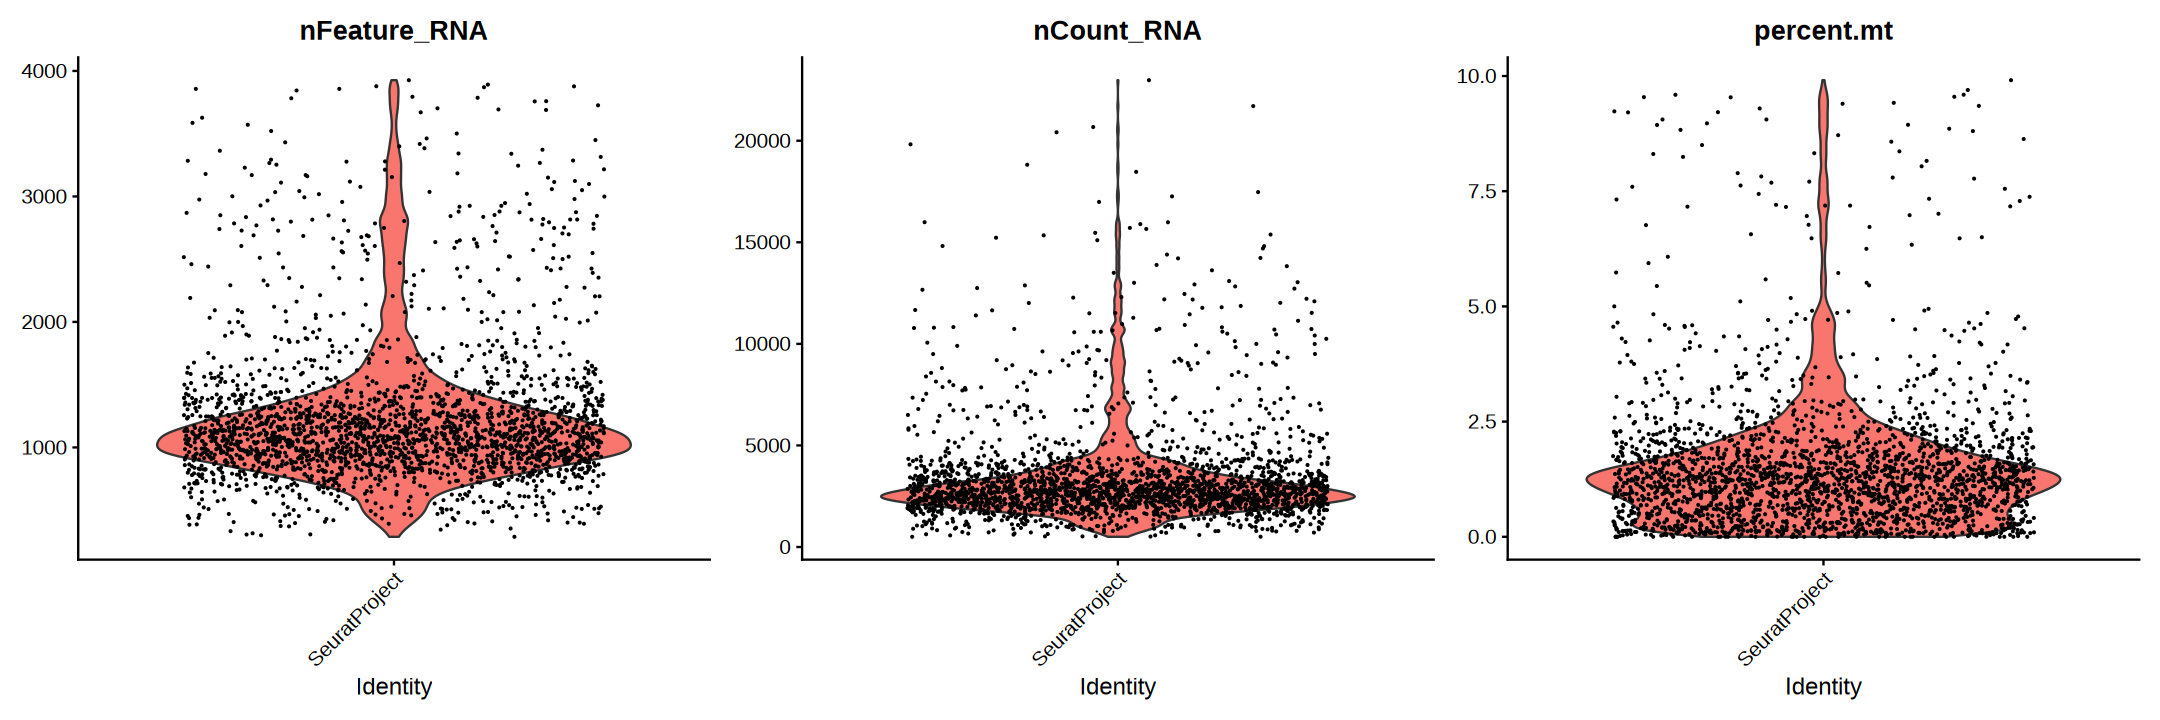

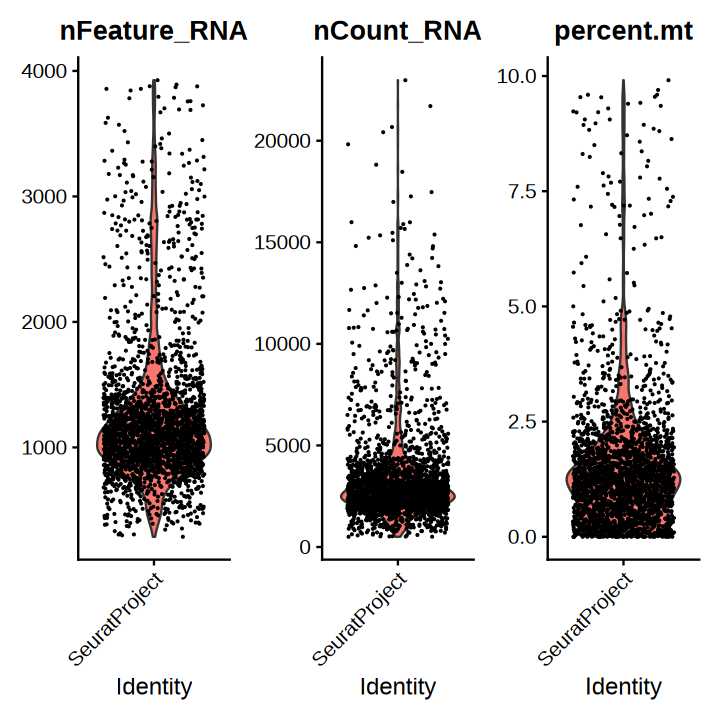

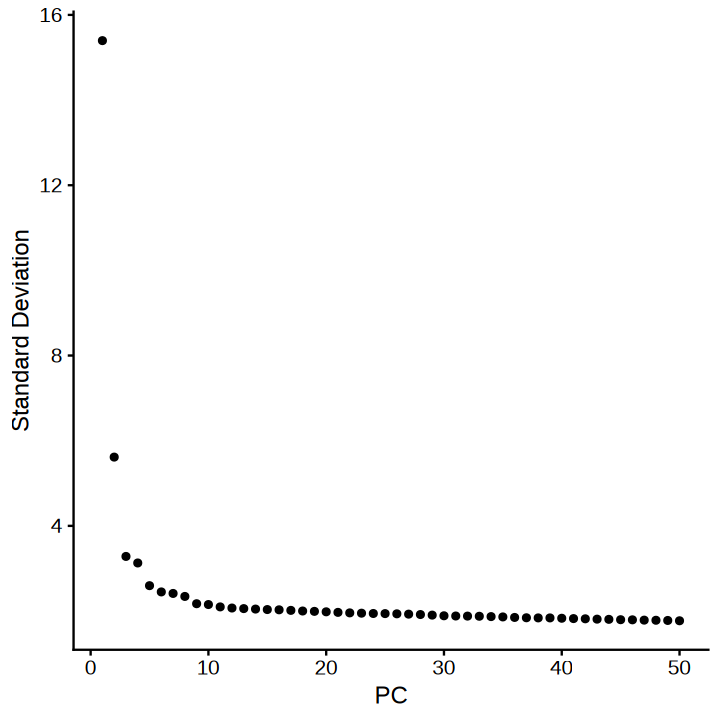

,cell_name,orig.ident,nCount_RNA,nFeature_RNA,X_batch,pre_cell_type,status,percent.mt,RNA_snn_res.0.2,seurat_clusters,UMAP1,UMAP2
,<chr>,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>,<dbl>,<fct>,<fct>,<dbl>,<dbl>
AACTCCCGTGTCGCTG-1;healthy,AACTCCCGTGTCGCTG-1;healthy,SeuratProject,1069,552,lost_7_batches,B cell,healthy,9.541628,3,3,-10.31004,11.63944
AACTGGTTCGGCTTGG-1;healthy,AACTGGTTCGGCTTGG-1;healthy,SeuratProject,3979,1326,lost_7_batches,B cell,healthy,5.001257,3,3,-10.71717,12.03406


[1] 2507   12

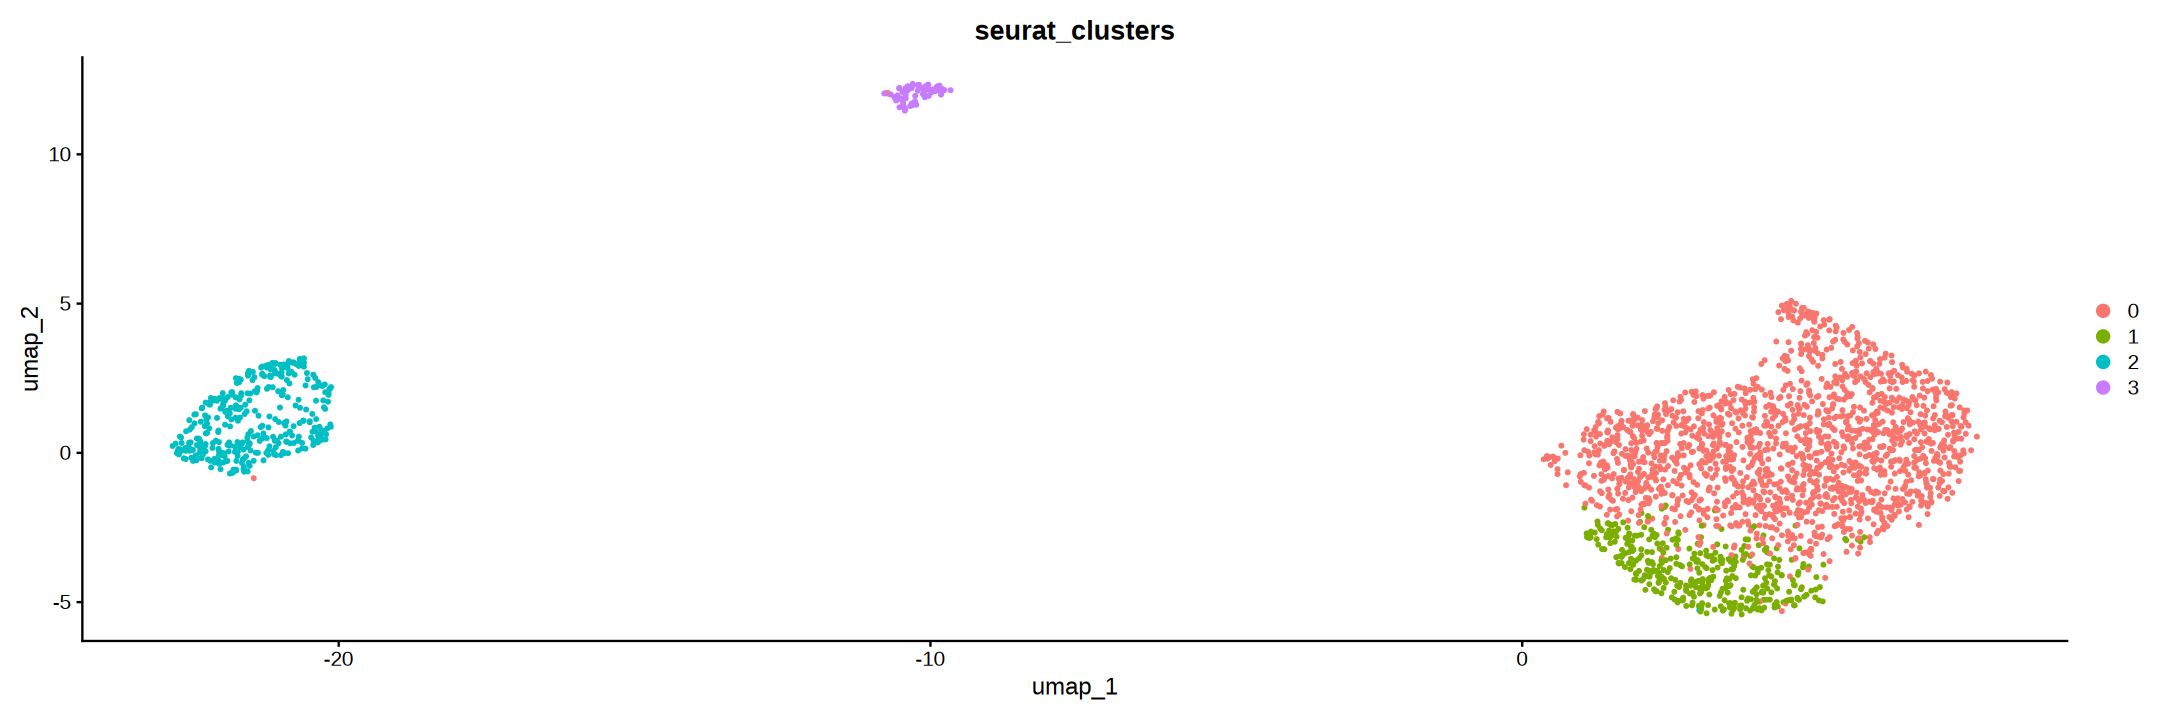

[out][plot] merge_B_umap_cluster_without_harmony.png
	in ./fig
[out] obs_seurat_merge_B_without_harmony.csv


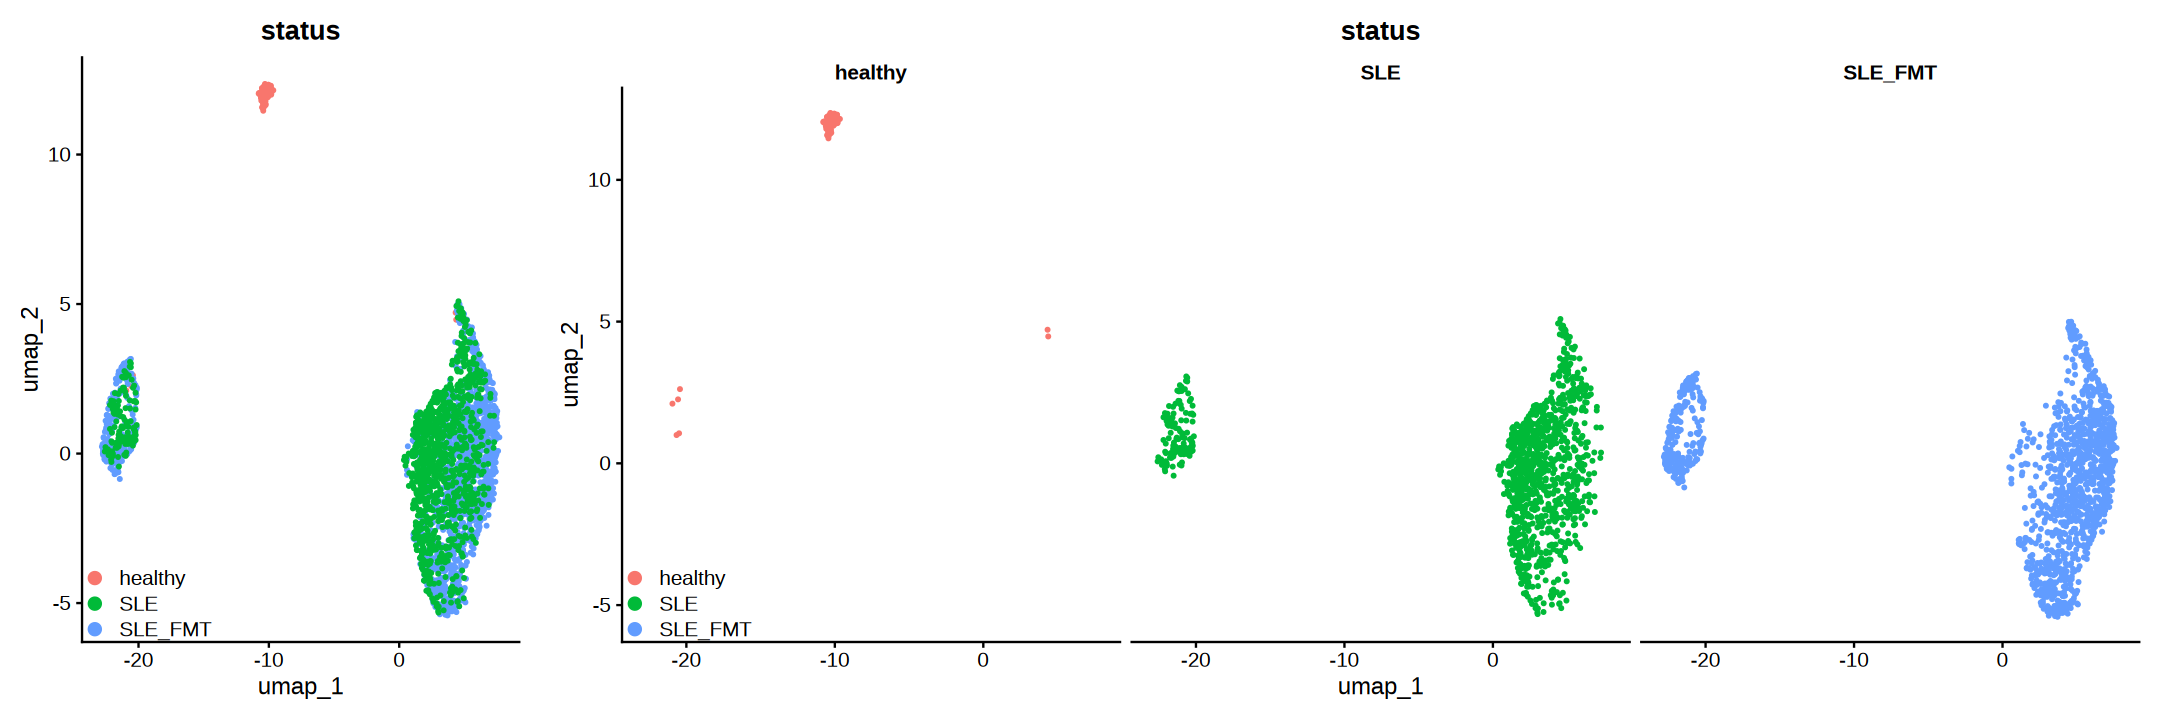

In [6]:
item = 'merge_B'
dims = 1:12
resolution = 0.2

p_out = file.path(sprintf('obs_seurat_%s_without_harmony.csv',item))
if(file.exists(p_out)){
    cat(sprintf('[exist] %s\n',p_out))
}else{
    adata <- load_Seuratobj(file.path(p_cache, "disease", "merge_mouse_kideny_healthy_SLE_imm_B"))
    adata@meta.data = adata@meta.data %>% select(cell_name,orig.ident,
                                                 nCount_RNA,nFeature_RNA,X_batch,cell_type,status) %>%
        rename(pre_cell_type = cell_type)
    
    # QC
    {
        adata[["percent.mt"]] <- PercentageFeatureSet(adata, pattern = "^[Mm][Tt]-")
        # -------------------------
        # percent.mt_before.png
        # -------------------------
        ncol_ <- 3
        nrow_ <- 1
        options(repr.plot.width = 6 * ncol_, repr.plot.height = 6 * nrow_)
        p = VlnPlot(adata, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
        print(p)
        adata <- subset(adata, subset = nFeature_RNA > 200 & nFeature_RNA < 4000 & percent.mt < 10)
        # -------------------------
        # percent.mt.png
        # -------------------------
        ncol_ <- 3
        nrow_ <- 1
        options(repr.plot.width = 6 * ncol_, repr.plot.height = 6 * nrow_)
        p = VlnPlot(adata, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
        print(p)
    }
    # 标准流程
    {
        adata@meta.data %>% head(2)
        options(repr.plot.width = 1 * 6, repr.plot.height = 1 * 6)
        adata <- Map_Seurat_normalize(adata)
        # function (adata, dims, resolution, key_batch, key_celltype = NULL, verbose = FALSE)
        options(repr.plot.width = 1 * 6, repr.plot.height = 1 * 6)
        adata <- Map_Seurat_cluster(adata, dims = dims, resolution = resolution)
    }
    # UMAPPlot
    {
        options(repr.plot.width = 1 * 6, repr.plot.height = 1 * 6)
        p1 <- UMAPPlot(adata,group.by='status')  + them_legend
        options(repr.plot.width = 3 * 6, repr.plot.height = 1 * 6)
        p2 <- UMAPPlot(adata,group.by='status', split.by = 'status') + them_legend
        
        p=cowplot::plot_grid(p1,p2,nrow=1,ncol=2,rel_widths = c(1,3))
        print(p)
        savefig(p,sprintf('%s_umap_cluster_without_harmony.png',item),p_plot_item,
                width_ratio = ncol_ * 6, height_ratio = nrow_  * 6)
    }
    df.show(adata@meta.data)
    adata@meta.data %>% select(cell_name,seurat_clusters,UMAP1,UMAP2) %>%
        write_csv(p_out)
    rm(adata)
    cat(sprintf('[out] %s\n',p_out))
}